In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import zscore

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("SONAR.csv")
data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [4]:
data.dtypes

0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.0180    float64
0.0084    float64
0.0090    float64
0.0032    float64
R          object
Length: 61, dtype: object

In [5]:
data.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
data.shape

(207, 61)

In [7]:
df=data.iloc[:,0:-1]


In [8]:
pca=PCA(n_components=10)
df1=pca.fit_transform(df)
df1.shape

(207, 10)

In [9]:
dat=pd.DataFrame(df1)
dat

,0,1,2,3,4,5,6,7,8,9
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048
...,...,...,...,...,...,...,...,...,...,...
202,0.049918,-1.028980,0.265634,0.026018,-0.014738,0.097506,0.012021,0.178998,0.029362,-0.268631
203,0.228374,-1.149870,0.200437,0.043461,0.182020,0.010158,0.084858,0.266152,-0.068963,-0.307679
204,0.306763,-1.147756,0.248975,-0.058557,0.161337,0.013778,0.049391,0.227866,-0.070132,-0.313294
205,-0.038083,-0.994049,0.201938,-0.060790,-0.147673,-0.088874,0.018656,0.069504,-0.024406,-0.165303


In [10]:
dat[10]=data.iloc[:,-1]

In [11]:
dat

,0,1,2,3,4,5,6,7,8,9,10
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679,R
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334,R
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182,R
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480,R
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048,R
...,...,...,...,...,...,...,...,...,...,...,...
202,0.049918,-1.028980,0.265634,0.026018,-0.014738,0.097506,0.012021,0.178998,0.029362,-0.268631,M
203,0.228374,-1.149870,0.200437,0.043461,0.182020,0.010158,0.084858,0.266152,-0.068963,-0.307679,M
204,0.306763,-1.147756,0.248975,-0.058557,0.161337,0.013778,0.049391,0.227866,-0.070132,-0.313294,M
205,-0.038083,-0.994049,0.201938,-0.060790,-0.147673,-0.088874,0.018656,0.069504,-0.024406,-0.165303,M


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209616C6670>,
      dtype=object)

<Figure size 720x432 with 0 Axes>

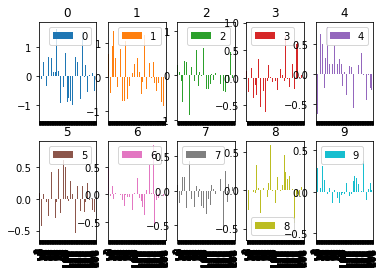

In [12]:
plt.figure(figsize=(10,6))
dat.plot(kind="bar",subplots=True,layout=(2,5))

{'whiskers': [<matplotlib.lines.Line2D object at 0x0000020965D3C850>, <matplotlib.lines.Line2D object at 0x0000020963BA80A0>], 'caps': [<matplotlib.lines.Line2D object at 0x0000020963BE2DC0>, <matplotlib.lines.Line2D object at 0x0000020963BF0EE0>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000020963559D60>], 'medians': [<matplotlib.lines.Line2D object at 0x0000020963BF0670>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000020963BFECA0>], 'means': []}


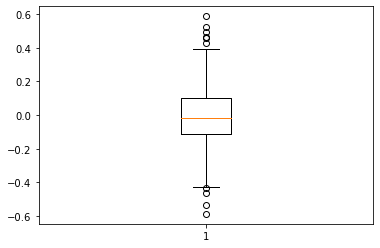

In [13]:
print(plt.boxplot(dat[8]))

In [14]:
dat.skew()

0    0.182486
1    0.412060
2    0.182902
3    0.438051
4   -0.057592
5    0.283933
6    0.415527
7    0.060027
8    0.226722
9   -0.297189
dtype: float64

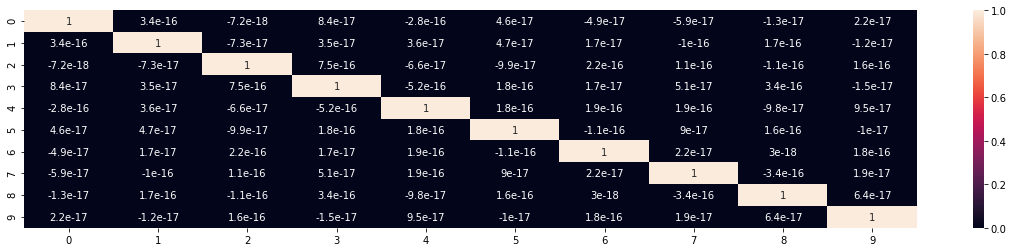

In [15]:
plt.figure(figsize=(20,4))
sns.heatmap(dat.corr(),annot=True)

In [16]:
dat[11]=pd.factorize(dat.iloc[:,-1])[0]

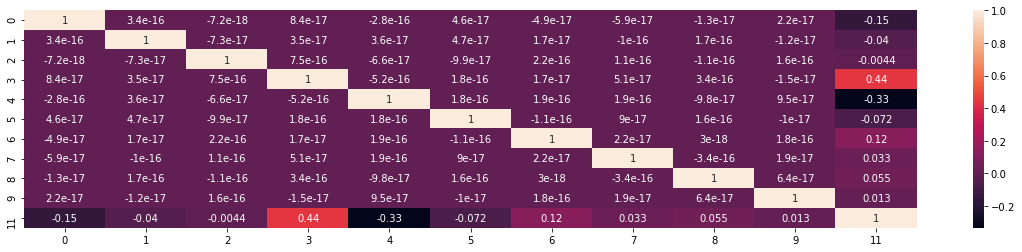

In [17]:
plt.figure(figsize=(20,4))
sns.heatmap(dat.corr(),annot=True)

In [18]:
dat.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10     object
11      int64
dtype: object

In [19]:
dat.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679,R,0
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334,R,0
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182,R,0
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480,R,0
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048,R,0


In [20]:
dat[11].value_counts()

1    111
0     96
Name: 11, dtype: int64

In [21]:
data=dat.drop(10,axis=1)

In [22]:
z=np.abs(zscore(data))
data=data[(z<3).all(axis=1)]
np.where(z>3)

(array([145, 163, 170], dtype=int64), array([9, 6, 7], dtype=int64))

In [23]:
data.shape

(204, 11)

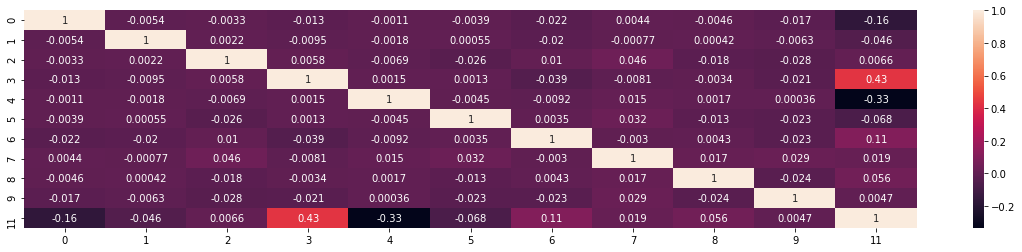

In [24]:
plt.figure(figsize=(20,4))
sns.heatmap(data.corr(),annot=True)

In [25]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,11
0,1.000000,-0.005449,-0.003326,-0.013140,-0.001130,-0.003941,-0.022233,0.004419,-0.004638,-0.016698,-0.161433
1,-0.005449,1.000000,0.002153,-0.009457,-0.001781,0.000549,-0.019529,-0.000774,0.000424,-0.006328,-0.046177
2,-0.003326,0.002153,1.000000,0.005815,-0.006914,-0.026078,0.010342,0.046357,-0.017641,-0.027916,0.006568
3,-0.013140,-0.009457,0.005815,1.000000,0.001512,0.001343,-0.038614,-0.008127,-0.003397,-0.020769,0.433089
4,-0.001130,-0.001781,-0.006914,0.001512,1.000000,-0.004533,-0.009206,0.014728,0.001672,0.000357,-0.332916
5,-0.003941,0.000549,-0.026078,0.001343,-0.004533,1.000000,0.003473,0.032372,-0.013436,-0.022970,-0.067576
6,-0.022233,-0.019529,0.010342,-0.038614,-0.009206,0.003473,1.000000,-0.002973,0.004255,-0.022590,0.105401
7,0.004419,-0.000774,0.046357,-0.008127,0.014728,0.032372,-0.002973,1.000000,0.017278,0.029260,0.018635
8,-0.004638,0.000424,-0.017641,-0.003397,0.001672,-0.013436,0.004255,0.017278,1.000000,-0.024004,0.056180
9,-0.016698,-0.006328,-0.027916,-0.020769,0.000357,-0.022970,-0.022590,0.029260,-0.024004,1.000000,0.004739


In [26]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [27]:
x.shape

(204, 10)

In [28]:
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048


In [29]:
y.shape
y=pd.DataFrame(y)

In [30]:
y.tail()

,11
202,1
203,1
204,1
205,1
206,1


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=43)
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(41, 10)
(163, 10)
(41, 1)
(163, 1)


In [32]:
model=[SVC(),GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]

for m in model:
    print("-------------------->",m,"<---------------------")
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("AC:",accuracy_score(y_test,predm))
    print("score:",m.score(x_train,y_train))
    
    print("CA:",confusion_matrix(y_test,predm))
    print("CR:",classification_report(y_test,predm))
    print("AUC:",roc_auc_score(y_test,m.predict(x_test)))
    print("\n")
    

--------------------> SVC() <---------------------
AC: 0.7804878048780488
score: 0.9079754601226994
CA: [[15  9]
 [ 0 17]]
CR:               precision    recall  f1-score   support

           0       1.00      0.62      0.77        24
           1       0.65      1.00      0.79        17

    accuracy                           0.78        41
   macro avg       0.83      0.81      0.78        41
weighted avg       0.86      0.78      0.78        41

AUC: 0.8125


--------------------> GaussianNB() <---------------------
AC: 0.7804878048780488
score: 0.8159509202453987
CA: [[17  7]
 [ 2 15]]
CR:               precision    recall  f1-score   support

           0       0.89      0.71      0.79        24
           1       0.68      0.88      0.77        17

    accuracy                           0.78        41
   macro avg       0.79      0.80      0.78        41
weighted avg       0.81      0.78      0.78        41

AUC: 0.7953431372549019


--------------------> LogisticRegression() <-

CROSS VALICATION

In [38]:
for s in model:
    print("----------------------->",s,"<---------------------")
    cvs=cross_val_score(s,x,y,cv=10)
    
    print("MEAN:",cvs.mean())
    
    print(cvs)
    
    print("\n")

-----------------------> SVC() <---------------------
MEAN: 0.6169047619047618
[0.47619048 0.80952381 0.76190476 0.57142857 0.65       0.25
 0.6        0.8        0.4        0.85      ]


-----------------------> GaussianNB() <---------------------
MEAN: 0.6221428571428571
[0.38095238 0.76190476 0.85714286 0.57142857 0.65       0.3
 0.6        0.9        0.6        0.6       ]


-----------------------> LogisticRegression() <---------------------
MEAN: 0.6566666666666666
[0.19047619 0.71428571 0.95238095 0.80952381 0.6        0.45
 0.7        0.9        0.45       0.8       ]


-----------------------> DecisionTreeClassifier() <---------------------
MEAN: 0.6454761904761905
[0.38095238 0.95238095 0.85714286 0.71428571 0.5        0.3
 0.75       0.8        0.55       0.65      ]


-----------------------> KNeighborsClassifier() <---------------------
MEAN: 0.5966666666666668
[0.66666667 0.80952381 0.66666667 0.52380952 0.8        0.25
 0.6        0.55       0.4        0.7       ]




In [34]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=150,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7804878048780488
[[16  8]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.94      0.67      0.78        24
           1       0.67      0.94      0.78        17

    accuracy                           0.78        41
   macro avg       0.80      0.80      0.78        41
weighted avg       0.83      0.78      0.78        41



ENSEMBLE

In [35]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.7073170731707317
[[15  9]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        24
           1       0.61      0.82      0.70        17

    accuracy                           0.71        41
   macro avg       0.72      0.72      0.71        41
weighted avg       0.74      0.71      0.71        41



In [36]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.7073170731707317
[[15  9]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        24
           1       0.61      0.82      0.70        17

    accuracy                           0.71        41
   macro avg       0.72      0.72      0.71        41
weighted avg       0.74      0.71      0.71        41



In [37]:
g=LogisticRegression()

#create adaboost 
ad=AdaBoostClassifier(n_estimators=50,base_estimator=g,algorithm="SAMME")
ad.fit(x_train,y_train)

ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7317073170731707
[[13 11]
 [ 0 17]]
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        24
           1       0.61      1.00      0.76        17

    accuracy                           0.73        41
   macro avg       0.80      0.77      0.73        41
weighted avg       0.84      0.73      0.72        41

